# Visualizing the key features

# a. Property Price distribution

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../Data/ontario_retirement_house_investment_data.csv')



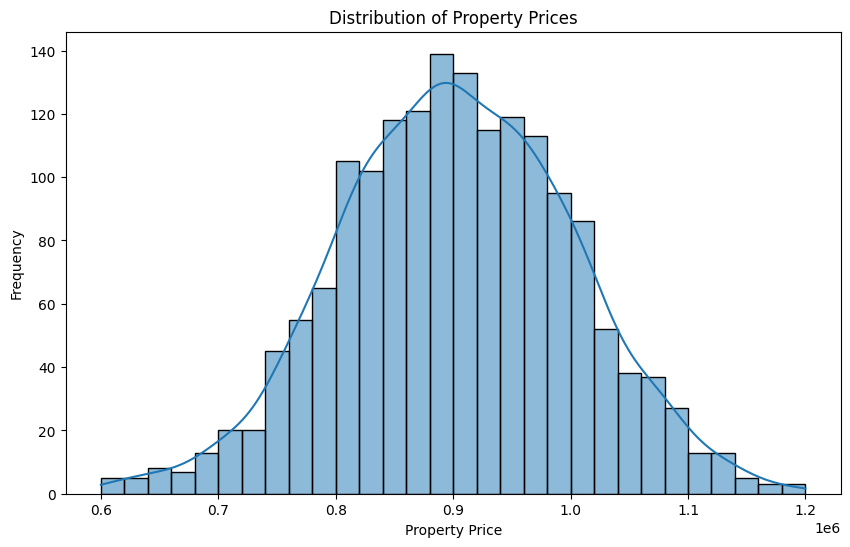

In [6]:
#Plot property prices distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Property_Price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.show()

# b. Population growth rate of Age 65+ by city

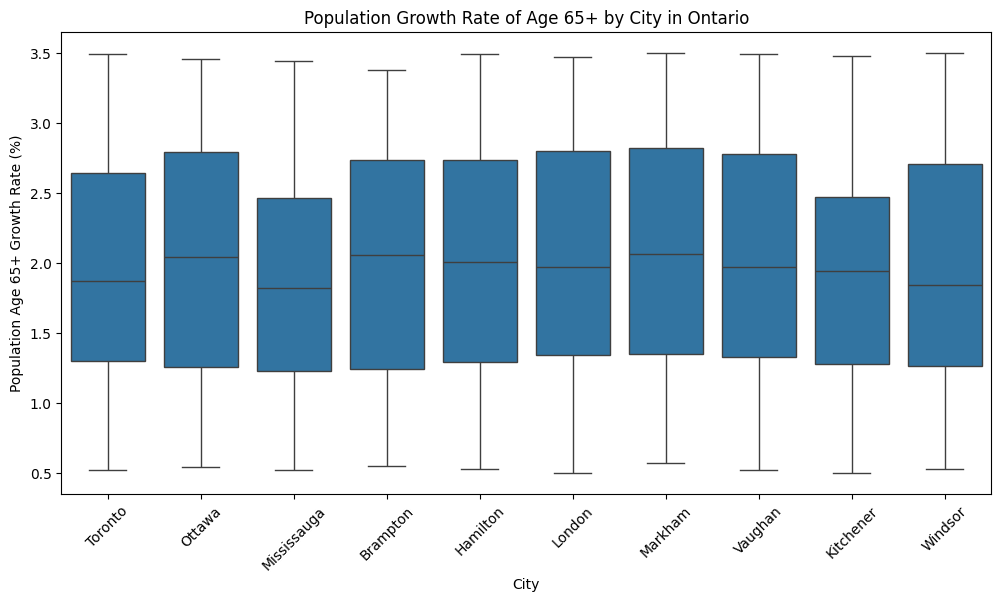

In [10]:
# Plot distribution of population growth rate
# Plot population growth rate by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Population_Age_65_Growth', data=df)
plt.title('Population Growth Rate of Age 65+ by City in Ontario')
plt.xlabel('City')
plt.ylabel('Population Age 65+ Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()

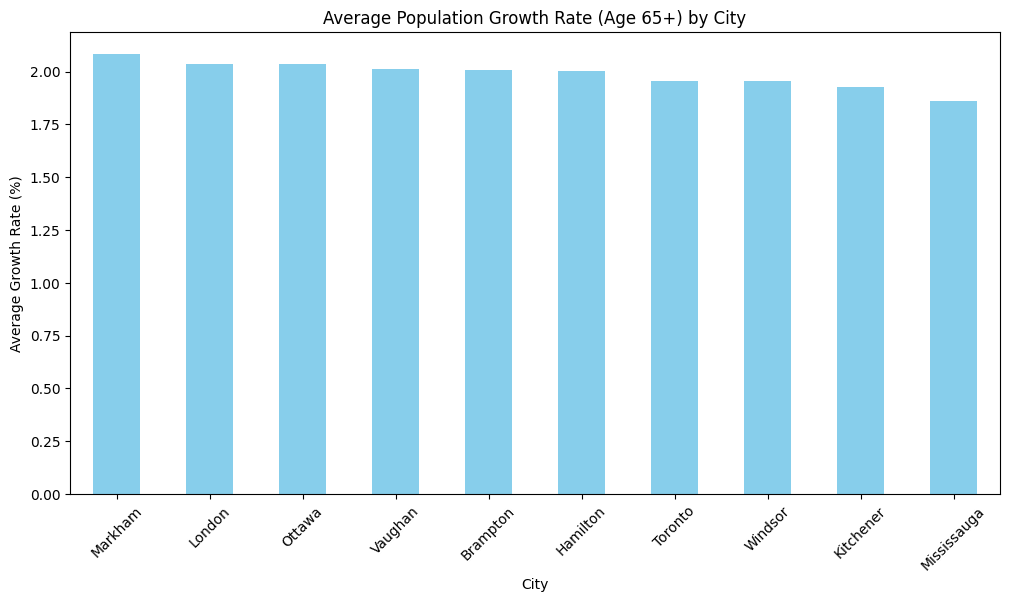

In [13]:
# Create a bar chart of the average population growth rate by city
plt.figure(figsize=(12, 6))
avg_growth_rate = df.groupby('City')['Population_Age_65_Growth'].mean().sort_values(ascending=False)

# Plot the sorted bar chart
avg_growth_rate.plot(kind='bar', color='skyblue')
plt.title('Average Population Growth Rate (Age 65+) by City')
plt.xlabel('City')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()


### Deep Down to the EDA

### It looks like Markham and London has the highest population growth rate for Age 65+ which gives us an oppurtunity to look further of those cities if they are worth to invest.

### Proximity to Healthcare Facilities
- Why it matters: Proximity to healthcare is crucial for senior living areas, as elderly residents often need access to hospitals and clinics.
- What to check: Investigate the Proximity_to_Healthcare feature to see if London and Markham have lower distances to healthcare facilities compared to other cities. Cities with closer healthcare facilities can attract more seniors, boosting occupancy rates.

In [14]:
# Average proximity to healthcare for London and Markham
df[df['City'].isin(['London', 'Markham'])].groupby('City')['Proximity_to_Healthcare'].mean()


City
London     5.232143
Markham    5.380952
Name: Proximity_to_Healthcare, dtype: float64

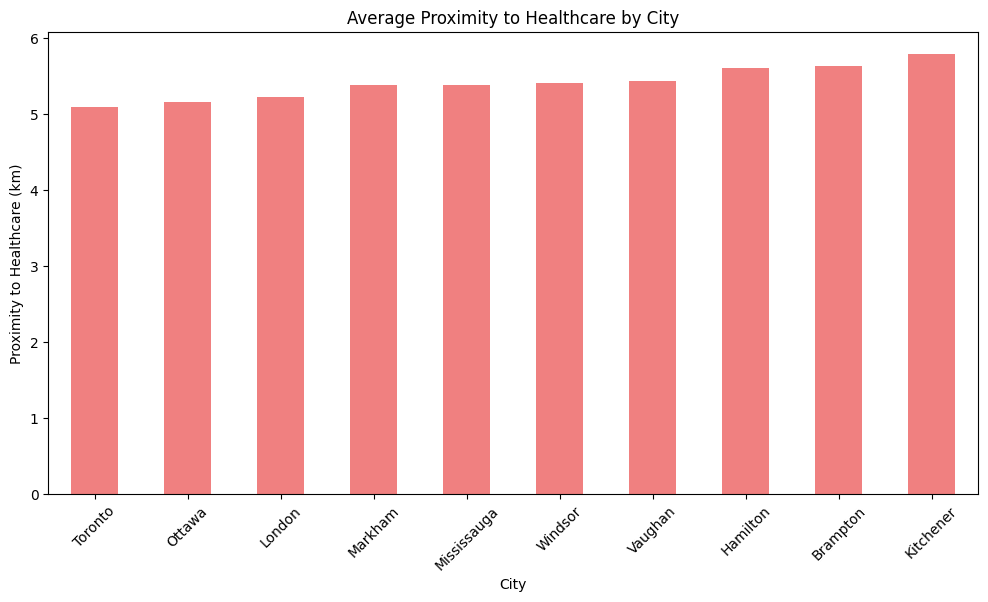

In [15]:
# Create a bar chart of the average proximity to healthcare by city
plt.figure(figsize=(12, 6))
avg_healthcare_proximity = df.groupby('City')['Proximity_to_Healthcare'].mean().sort_values()

# Plot the bar chart
avg_healthcare_proximity.plot(kind='bar', color='lightcoral')
plt.title('Average Proximity to Healthcare by City')
plt.xlabel('City')
plt.ylabel('Proximity to Healthcare (km)')
plt.xticks(rotation=45)
plt.show()


### It looks like London has a better proximity to the nearest healthcare facilities

## Occupancy Rates
- Why it matters: Higher Occupancy_Rate means that senior living facilities in these cities are already in high demand, indicating a potential shortage of senior housing and room for new investments.
- What to check: Compare the current occupancy rates in London and Markham to see if they are already near capacity, suggesting good investment opportunities to meet demand.

In [16]:
# Compare occupancy rates in London and Markham
df[df['City'].isin(['London', 'Markham'])].groupby('City')['Occupancy_Rate'].mean()


City
London     82.130952
Markham    82.613095
Name: Occupancy_Rate, dtype: float64

## Also there are other aspects to check like;
- Property Prices
- Goverment incentives
- Crime Rate
- Walkability Score
- Environmental Quality
- Property Tax rate
- Senior living vacancy rate
- Mental health and Mamory care programs

## Let's put them all togehter in a subplot visualization, that will only cover London and Markham comparison

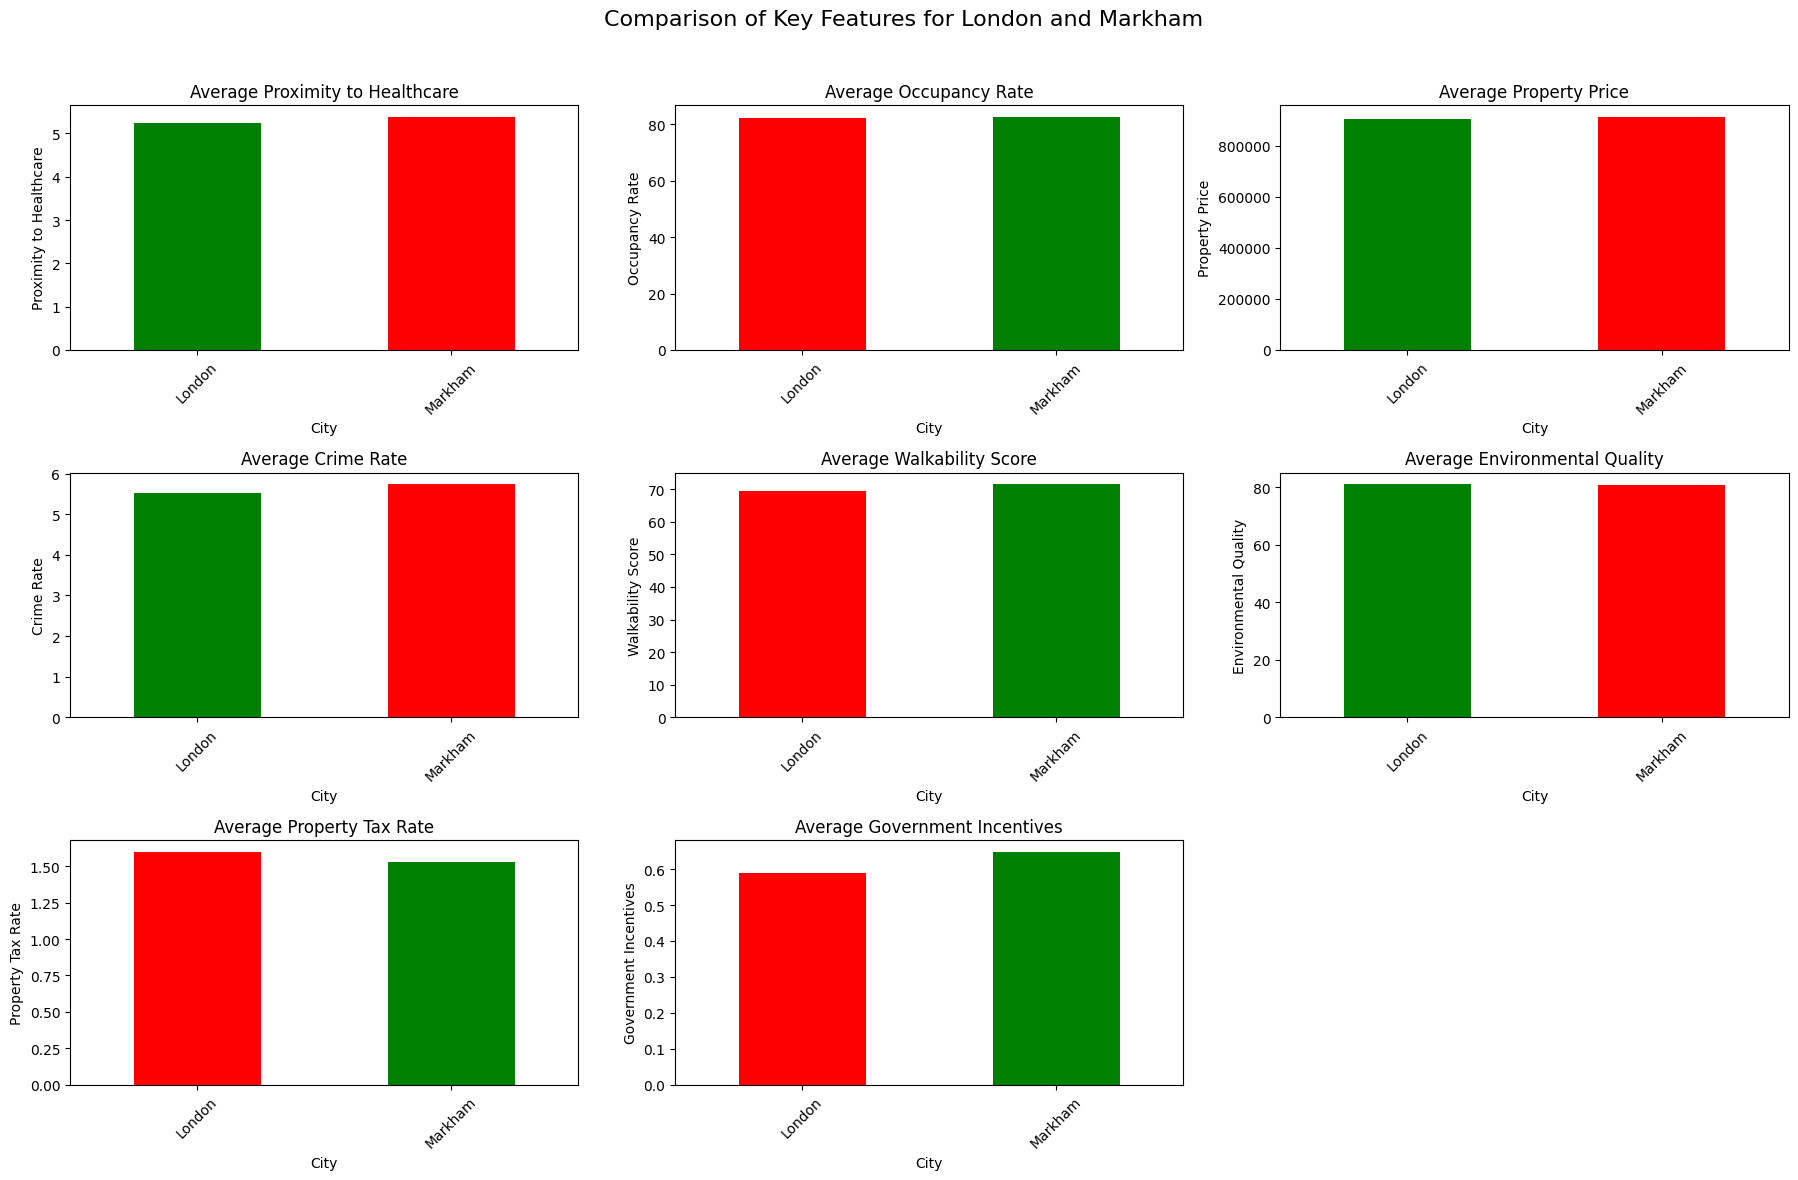

In [23]:
# Filter data to include only London and Markham
df_filtered = df[df['City'].isin(['London', 'Markham'])]

# Features to compare and their conditions
features = {
    'Proximity_to_Healthcare': 'low',     # Lower is better
    'Occupancy_Rate': 'high',             # Higher is better
    'Property_Price': 'low',              # Lower is better
    'Crime_Rate': 'low',                  # Lower is better
    'Walkability_Score': 'high',          # Higher is better
    'Environmental_Quality': 'high',      # Higher is better
    'Property_Tax_Rate': 'low',           # Lower is better
    'Government_Incentives': 'high'       # Higher is better for incentives
}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Comparison of Key Features for London and Markham', fontsize=16)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Define function for conditional bar coloring
def get_colors(feature, values, condition):
    if condition == 'low':
        # Green for lower values (better), red for higher
        return ['green' if val == values.min() else 'red' for val in values]
    elif condition == 'high':
        # Green for higher values (better), red for lower
        return ['green' if val == values.max() else 'red' for val in values]

# Plot each feature
for i, (feature, condition) in enumerate(features.items()):
    avg_values = df_filtered.groupby('City')[feature].mean()

    # Apply conditional coloring based on whether 'low', 'high', or 'none' is better
    colors = get_colors(feature, avg_values, condition)
    
    # Plot the bar chart
    avg_values.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Average {feature.replace("_", " ")}')
    axes[i].set_xlabel('City')
    axes[i].set_ylabel(feature.replace("_", " "))
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if there are any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




## Conclusion
**From the analysis, it appears that both ***London*** and ***Markham*** have four features that stand out as favorable for investment. To make a well-informed decision, it's important to consult with stakeholders to prioritize these features based on their relevance to the overall investment strategy. Establishing a clear hierarchy of feature importance, aligned with the investment goals, will help guide the final decision-making process.**